In [10]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [11]:
data = pd.read_csv('C://Users//Asus//crime_data.csv')
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [12]:
data.rename(columns={"Unnamed: 0": "Un"},inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Un        50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [13]:
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return (x)

In [14]:
df_norm = norm_func(data.iloc[:,1:])
df_norm
df =data.iloc[:,1:]
df = df.iloc[:,:-1]
df

,Murder,Assault,UrbanPop
0,13.2,236,58
1,10.0,263,48
2,8.1,294,80
3,8.8,190,50
4,9.0,276,91
5,7.9,204,78
6,3.3,110,77
7,5.9,238,72
8,15.4,335,80
9,17.4,211,60


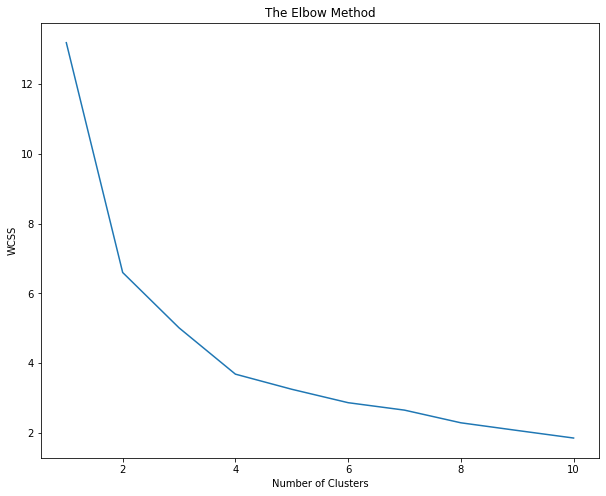

In [15]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_)
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [16]:
clf = KMeans(n_clusters=4)
y_kmeans = clf.fit_predict(df_norm)

In [8]:
y_kmeans
clf.labels_

array([2, 0, 0, 2, 0, 0, 3, 3, 0, 2, 3, 1, 0, 3, 1, 3, 1, 2, 1, 0, 3, 0,
       1, 2, 3, 1, 1, 0, 1, 3, 0, 0, 2, 1, 3, 3, 3, 3, 3, 2, 1, 2, 0, 3,
       1, 3, 3, 1, 1, 3])

In [17]:
md=pd.Series(y_kmeans)  
data['clust']=md  
data

,Un,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,3
7,Delaware,5.9,238,72,15.8,3
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,2


In [10]:
data.iloc[:,1:5].groupby(data.clust).mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,10.966667,264.000000,76.500000,33.608333
1,3.600000,78.538462,52.076923,12.176923
2,13.937500,243.625000,53.750000,21.412500
3,5.852941,141.176471,73.647059,19.335294


Text(0.5, 1.0, 'Clusters using KMeans')

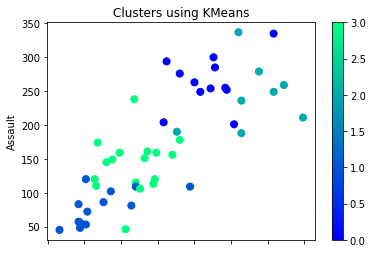

In [20]:
data.plot(x="Murder",y ="Assault",c=clf.labels_,kind="scatter",s=50 ,cmap=plt.cm.winter) 
plt.title('Clusters using KMeans')

Text(0.5, 1.0, 'Clusters using KMeans')

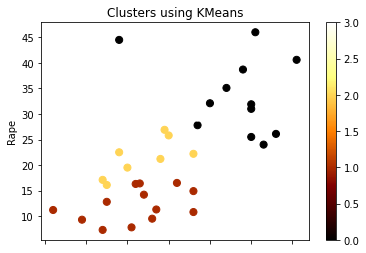

In [21]:
data.plot(x="UrbanPop",y ="Rape",c=clf.labels_,kind="scatter",s=50 ,cmap=plt.cm.afmhot) 
plt.title('Clusters using KMeans')

In [13]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
data_1 = pd.DataFrame(trans.fit_transform(data.iloc[:,1:]))
data_1

,0,1,2,3,4
0,0.746988,0.654110,0.440678,0.359173,0.666667
1,0.554217,0.746575,0.271186,0.961240,0.000000
2,0.439759,0.852740,0.813559,0.612403,0.000000
3,0.481928,0.496575,0.305085,0.315245,0.666667
4,0.493976,0.791096,1.000000,0.860465,0.000000
5,0.427711,0.544521,0.779661,0.811370,0.000000
6,0.150602,0.222603,0.762712,0.098191,1.000000
7,0.307229,0.660959,0.677966,0.219638,1.000000
8,0.879518,0.993151,0.813559,0.635659,0.000000
9,1.000000,0.568493,0.474576,0.478036,0.666667


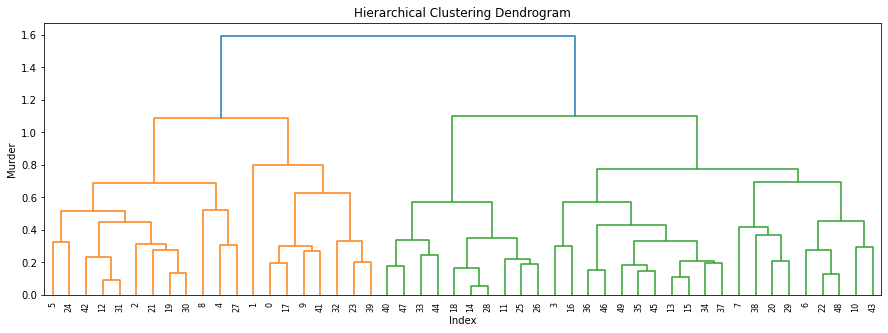

In [22]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(df_norm, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Murder')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

### creating a  new column and assigning it to new column

In [23]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=4, linkage='complete',affinity = "euclidean").fit(df_norm) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
data['clust']=cluster_labels 
data

,Un,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,0
